In [4]:
20*166*2

6640

# Inverse Problems

# Differential Equations

In [2]:
import Pkg; Pkg.add("SymPy")

    Updating registry at `C:\Users\carlo\.julia\registries\General.toml`
   Resolving package versions...
   Installed OrdinaryDiffEqStabilizedRK ────────── v1.1.0
   Installed Libmount_jll ──────────────────────── v2.40.3+0
   Installed OrdinaryDiffEqRKN ─────────────────── v1.1.0
   Installed Accessors ─────────────────────────── v0.1.41
   Installed OrdinaryDiffEqRosenbrock ──────────── v1.4.0
   Installed AlmostBlockDiagonals ──────────────── v0.1.10
   Installed Dierckx ───────────────────────────── v0.5.4
   Installed BoundaryValueDiffEqFIRK ───────────── v1.3.0
   Installed MutableArithmetics ────────────────── v1.6.1
   Installed NonlinearSolve ────────────────────── v3.15.1
   Installed Xorg_libpthread_stubs_jll ─────────── v0.1.2+0
   Installed TimerOutputs ──────────────────────── v0.5.26
   Installed OrdinaryDiffEqPRK ─────────────────── v1.1.0
   Installed OrdinaryDiffEqSDIRK ───────────────── v1.2.0
   Installed BoundaryValueDiffEqMIRK ───────────── v1.3.0
   Installed Or

In [12]:
using Plots
using LinearAlgebra

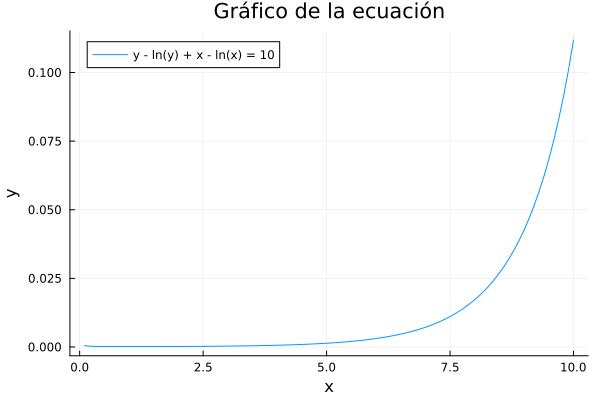

In [5]:
# Definir las variables
@syms x y

# Definir la ecuación
equation = y - log(y) + x - log(x) - 10

# Resolver para y en términos de x
y_solution = solve(equation, y)[1]

# Crear una función para graficar
f(x_val) = float(subs(y_solution, x => x_val))

# Generar un rango de valores de x
x_vals = 0.1:0.1:10

# Calcular los valores correspondientes de y
y_vals = [f(x) for x in x_vals]

# Graficar
plot(x_vals, y_vals, label="y - ln(y) + x - ln(x) = 10", xlabel="x", ylabel="y", title="Gráfico de la ecuación")


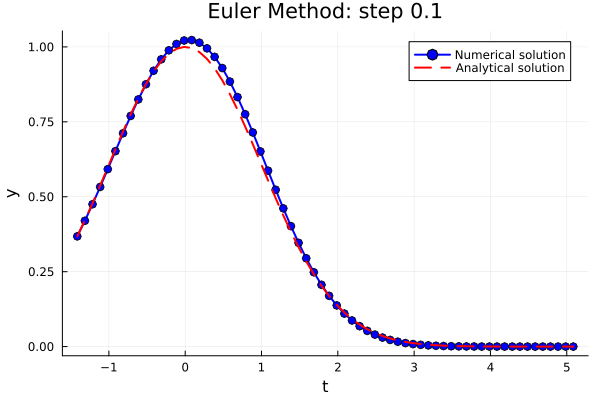

In [19]:
f0(t,y) = -t * y
function euler_explicito(f, y0, t0, t_end, h)
    t = t0
    y = y0
    resultados = [(t, y)]
    while t < t_end
        y_next = y + h * f(t, y)
        y = y_next
        t += h
        push!(resultados, (t, y))
    end
    return resultados
end

resultados_euler_explicito = euler_explicito(f0, exp(-1.0), -sqrt(2.0), 5.0, 0.1)

begin
	plot([r[1] for r in resultados_euler_explicito], [r[2] for r in resultados_euler_explicito], label="Numerical solution", lw=2, marker=:o, color=:blue,title="Euler Method: step 0.1",xlabel="t",ylabel="y")
	plot!([r[1] for r in resultados_euler_explicito], [exp(-0.5 *r[1]^2) for r in resultados_euler_explicito], label="Analytical solution", lw=2, linestyle=:dash, color=:red)
end

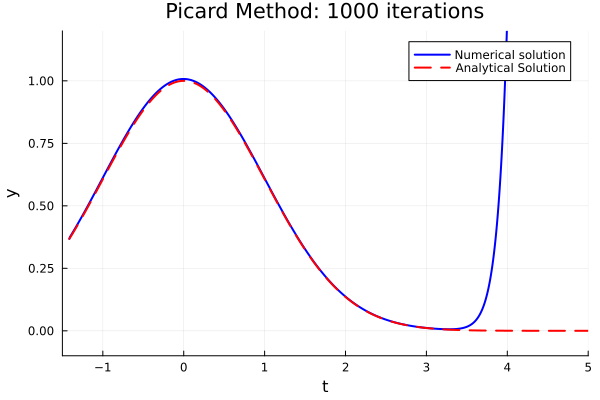

In [16]:
function picard(f, y0, t0, t_end, N; tol=1e-7, max_iter=100)
    t = [t0 + i*(t_end-t0)/(N-1) for i in 0:N-1]
    y = [y0 for i in 1:N]
    resultados = [copy(y)]  
    for k in 1:max_iter
        y_new = copy(y)
        for i in 2:N  
            y_new[i] = y0 + sum([f(t[j], y[j])*(t[i] - t[i-1]) for j in 1:i])
        end
		if norm(y-y_new)<tol
			return t, resultados
		end
        y = y_new
        push!(resultados, copy(y)) 
    end
    return t, resultados
end
resultados_picard = picard(f0, exp(-1.0), -sqrt(2.0), 5.0, 1000)

begin
	plot(resultados_picard[1],resultados_picard[2][15],label="Numerical solution",title="Picard Method: 1000 iterations",xlabel="t",ylabel ="y",legend=:topright,xlim=[-1.5,5],ylim=[-0.1,1.2],lw=2,color=:blue)
	plot!(resultados_picard[1],[exp(-0.5 * resultados_picard[1][l]^2) for l in 1:length(resultados_picard[1])],label="Analytical Solution",linewidth=2,lw=2, linestyle=:dash, color=:red)
end

# Markov Chains

In [148]:
using Random
using Statistics

In [20]:
using LinearAlgebra

# Función para calcular la distribución estacionaria
function stationary_distribution(P)
    # Eigenvectores y eigenvalores de Pᵀ
    vals, vecs = eigen(P')
    idx = argmax(-abs.(vals .- 1)) # Eigenvalor más cercano a 1
    π = vecs[:, idx]
    π  = π ./ sum(π) # Normalizar
    return π 
end

# Función para simular la convergencia de la distribución inicial
function simulate_markov_chain(P, initial_state, steps)
    state = initial_state
    history = [state]
    for _ in 1:steps
        state = state * P
        push!(history, state)
    end
    return history
end

# Ejemplo: Matriz de transición de la cadena de Markov
P = [
    0.95 0.05 0.0 0.0;
    0.05 0.9 0.05 0.0;
    0.0 0.01 0.98 0.01;
    0.0 0.0 0.05 0.95;
]

# Estado inicial arbitrario
initial_state = [0.25 0.25 0.25 0.25]  # Comenzar desde el primer estado

# Número de pasos para simular
steps = 100

# Calcular distribución estacionaria
π = stationary_distribution(P)
println("Distribución estacionaria: $π")


Distribución estacionaria: [0.1249999999999956, 0.12499999999999961, 0.6250000000000032, 0.1250000000000015]


In [37]:
P0 = [0.9 0.1;0.1 0.9]
stationary_distribution(P0)

2-element Vector{Float64}:
 0.5
 0.5

In [30]:
eigen(P0')

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.10000000000000009
  0.9999999999999999
vectors:
2×2 Matrix{Float64}:
 -0.707107  0.768221
  0.707107  0.640184

In [128]:
function random_stochastic_matrix(rows, cols)
    P = zeros(rows, cols)  # Inicializar la matriz
    for i in 1:rows
        row = rand(cols)  # Generar entradas aleatorias uniformes
        P[i, :] = row / sum(row)  # Normalizar para que la fila sume 1
    end
    return P
end

random_stochastic_matrix (generic function with 1 method)

In [137]:
A = random_stochastic_matrix(1000, 4)*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P*P

1000×4 Matrix{Float64}:
 0.146962  0.136089  0.599472  0.117476
 0.131245  0.127686  0.614646  0.126424
 0.149006  0.137269  0.598037  0.115689
 0.144417  0.13448   0.600344  0.120759
 0.155468  0.140455  0.589936  0.114141
 0.163455  0.144612  0.581627  0.110306
 0.164646  0.145203  0.580191  0.10996
 0.125238  0.125307  0.625883  0.123571
 0.122658  0.123639  0.626549  0.127154
 0.166157  0.146224  0.580033  0.107586
 0.126788  0.125959  0.623307  0.123945
 0.149308  0.137263  0.596692  0.116737
 0.167524  0.146645  0.576728  0.109103
 ⋮                             
 0.112868  0.118631  0.637512  0.130989
 0.158198  0.14209   0.588534  0.111178
 0.163683  0.144925  0.582614  0.108778
 0.110336  0.116671  0.636061  0.136931
 0.188003  0.157404  0.555603  0.09899
 0.12663   0.125132  0.618662  0.129576
 0.180846  0.153576  0.562541  0.103037
 0.140792  0.13287   0.605988  0.12035
 0.166514  0.146268  0.578745  0.108473
 0.150979  0.138277  0.595787  0.114956
 0.153091  0.139314  0.5932

In [152]:
maximum(sum(abs.(ones(1000) * reshape(stationary_distribution(P),(1,size(P)[1]))-A)/2, dims=2))

0.11530491476613504

In [150]:
eigen(P')

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 0.8657215644140676
 0.9384950708052787
 0.9757833647806552
 1.0000000000000009
vectors:
4×4 Matrix{Float64}:
  0.473793    0.127136   -0.61569   0.188982
 -0.798611   -0.0292539  -0.317491  0.188982
  0.368548   -0.748295    0.672395  0.944911
 -0.0437298   0.650412    0.260786  0.188982

In [13]:
initial_state*P

1×3 Matrix{Float64}:
 0.8  0.2  0.0

In [96]:
# Simular la cadena de Markov
history = simulate_markov_chain(P, initial_state, steps)

# Mostrar la evolución de la distribución
println("\nEvolución de la distribución:")
for (i, dist) in enumerate(history)
    println("Paso $i: $dist")
end



Evolución de la distribución:
Paso 1: [0.0 0.0 0.5 0.5]
Paso 2: [0.0 0.1 0.45 0.44999999999999996]
Paso 3: [0.010000000000000002 0.16 0.42500000000000004 0.40499999999999997]
Paso 4: [0.023 0.2 0.40650000000000003 0.37049999999999994]
Paso 5: [0.03610000000000001 0.22820000000000001 0.39144999999999996 0.34424999999999994]
Paso 6: [0.04809000000000001 0.24886 0.379065 0.32398499999999997]
Paso 7: [0.058549000000000004 0.264442 0.3688985 0.30811049999999995]
Paso 8: [0.0674285 0.2764538 0.36058185 0.29553584999999993]
Paso 9: [0.07484533 0.28586258 0.35379602499999996 0.28549606499999997]
Paso 10: [0.080977989 0.29331661 0.34826895449999995 0.2774364465]
Paso 11: [0.0860162533 0.2992688146 0.34377237785 0.27094255424999997]


In [15]:
using Plots

Precompiling IJuliaExt
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  ✓ Plots → IJuliaExt
  3 dependencies successfully precompiled in 15 seconds. 180 already precompiled.


In [67]:
function total_variation_distance(P, initial_state, steps)
    state = copy(initial_state)
    distances = zeros(steps)
    est = reshape(stationary_distribution(P),(1,size(P)[1]))
    for i in 1:steps
        distances[i] =  sum(abs.(state - est)) / 2
        state = state * P
    end
    return distances
end

total_variation_distance (generic function with 2 methods)

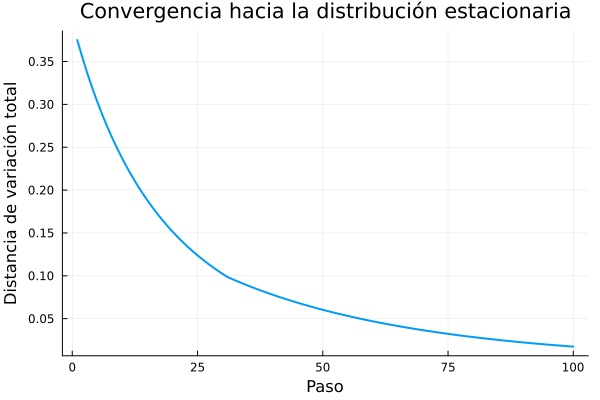

In [125]:
# Calcular la distancia de variación total
distances = total_variation_distance(P, initial_state,steps)

# Plot de la distancia de variación total
plot(
    1:steps, distances, 
    xlabel="Paso", ylabel="Distancia de variación total", 
    title="Convergencia hacia la distribución estacionaria", 
    legend=false, lw=2
)

In [17]:
using Random, Distributions

function monte_carlo_beta_integral(alpha, beta, n_samples=10^6)
    dist = Beta(alpha, beta)  # Definir la distribución Beta
    samples = rand(dist, n_samples)  # Generar muestras aleatorias
    integral_estimate = mean((samples .- 1/2) .^ 2)  # Calcular el valor esperado de x^2
    return integral_estimate
end

# Parámetros de la distribución Beta
alpha = 2
beta = 5
n_samples = 10^6

# Estimación de la integral
integral_value = monte_carlo_beta_integral(alpha, beta, n_samples)
println("Estimación de la integral: ", integral_value)


Estimación de la integral: 0.07135455348667326


In [1]:
using Random, Distributions

function monte_carlo_uniform_integral(n_samples=10^6)
    dist = Uniform(0, 1)  # Definir la distribución uniforme
    samples = rand(dist, n_samples)  # Generar muestras aleatorias
    integral_estimate = mean(12*(samples .- 1/2) .^ 2)  # Calcular el valor esperado de x^2
    return integral_estimate
end

# Número de muestras
n_samples = 10^6

# Estimación de la integral
integral_value = monte_carlo_uniform_integral(n_samples)
println("Estimación de la integral: ", integral_value)


Estimación de la integral: 0.9996296972734817


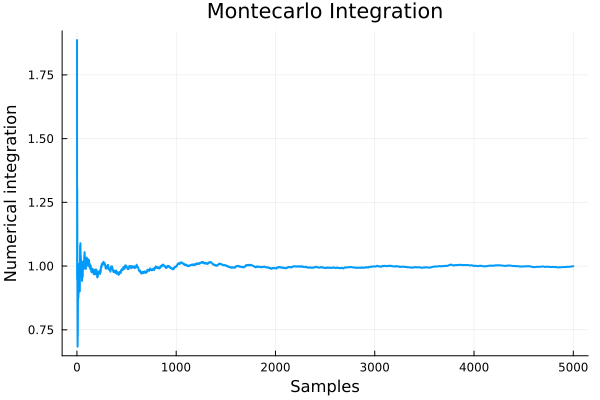

In [4]:
samples = rand(Uniform(0, 1), 5000) 
integral_estimate = [mean(12*(samples[1:t] .- 1/2) .^ 2) for t in 1:5000]
plot(integral_estimate, title="Montecarlo Integration", label="",xlabel="Samples", ylabel="Numerical integration", lw=2)

In [29]:
savefig("3_MontecarloIntegration.png")

"C:\\Users\\carlo\\3_MontecarloIntegration.png"

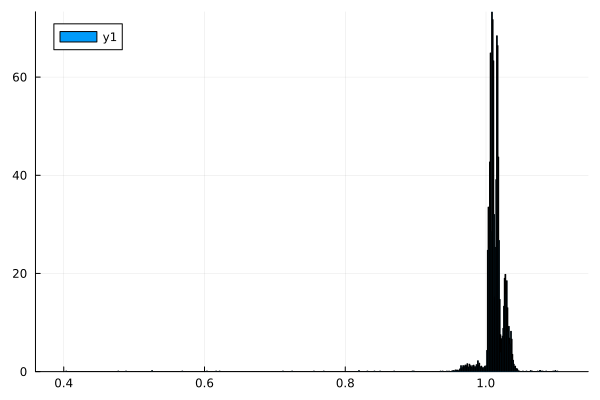

In [19]:
histogram(integral_estimate, normalize=true)

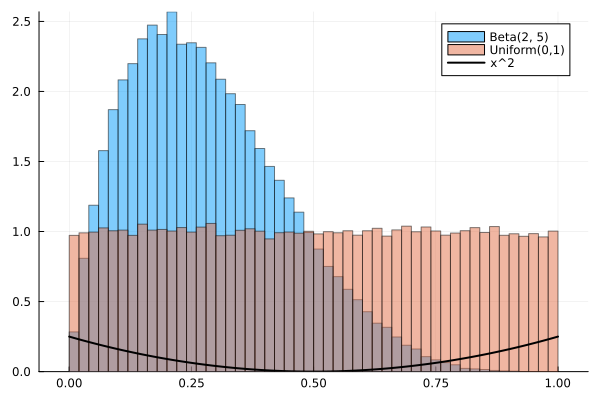

In [3]:
using Random, Distributions, Plots

function plot_distributions_and_integrand(alpha, beta, n_samples=10^6)
    # Definir distribuciones
    beta_dist = Beta(alpha, beta)
    uniform_dist = Uniform(0, 1)

    # Generar muestras
    beta_samples = rand(beta_dist, n_samples)
    uniform_samples = rand(uniform_dist, n_samples)

    # Crear histogramas normalizados
    hist_beta = histogram(beta_samples, bins=50, normalize=:pdf, alpha=0.5, label="Beta($alpha, $beta)")
    hist_uniform = histogram!(uniform_samples, bins=50, normalize=:pdf, alpha=0.5, label="Uniform(0,1)")

    # Graficar x^2 sobre el histograma
    x = range(0, 1, length=100)
    plot!(x, (x .- 1/2).^2, lw=2, label="x^2", color=:black)

    return hist_beta
end

# Parámetros de la distribución Beta
alpha = 2
beta = 5
n_samples = 10^5

# Generar el gráfico
plot_distributions_and_integrand(alpha, beta, n_samples)
